In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import hyperspy.api as hys
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
import tkinter.filedialog as tkf

C:\Users\user\Anaconda3\envs\CS\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)


In [2]:
img_adr = tkf.askopenfilenames()
print(img_adr)

('D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_001.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_002.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_003.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_004.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_005.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_006.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_007.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_008.tif', 'D:/documents/documents(research)/20181130 Image Processing/STO_ZA[110]_181202 data/ADF1/image_009.tif', 'D:/documents/documents(research)/20181130 Image Proce

In [3]:
def pca(data_set, eigenvector=False, projection=None, inverse=False, n_comp=100, solver="auto"):
    print("Doing PCA...")

    pca = PCA(n_components=n_comp, svd_solver=solver, whiten=False)
    pca.fit(data_set)
    print(pca.explained_variance_ratio_)
    print(np.sum(pca.explained_variance_ratio_))

    fig1, ax1 = plt.subplots(figsize=(5,3))
    ax1.plot(np.cumsum(pca.explained_variance_ratio_), c="darkslategrey")
    ax1.grid()
    ax1.set_xlabel('number of components')
    ax1.set_ylabel('cumulative explained variance')
    #print len(pca.components_)
    #plt.show()
    #plt.close(fig1)

    reduced_projection = pca.transform(data_set)
    restore = pca.inverse_transform(reduced_projection)
        
    if eigenvector:
        fig2, ax2 = plt.subplots(n_comp, 1, figsize=(10, n_comp))
        temp_flat = ax2.flat
        for i, ax in enumerate(temp_flat[:n_comp]):
            ax.plot(pca.components_[i], c="darkslategrey")
            ax.grid()
        #plt.show()
        #plt.close(fig2)

    if projection:
        fig3= plt.figure(figsize=(10,10))
        ax3 = fig3.add_subplot(221)
        ax3.scatter(reduced_projection[:, 0], reduced_projection[:, 1], s=1.5, c="darkslategrey")
        ax3.grid()
        ax3.set_xlabel("component 1")
        ax3.set_ylabel("component 2")

        ax4 = fig3.add_subplot(222)
        ax4.scatter(reduced_projection[:, 1], reduced_projection[:, 2], s=1.5, c="darkslategrey")
        ax4.grid()
        ax4.set_xlabel("component 2")
        ax4.set_ylabel("component 3")

        ax5 = fig3.add_subplot(223)
        ax5.scatter(reduced_projection[:, 0], reduced_projection[:, 2], s=1.5, c="darkslategrey")
        ax5.grid()
        ax5.set_xlabel("component 1")
        ax5.set_ylabel("component 3")
        
        if n_comp > 2:
            ax6 = fig3.add_subplot(224, projection="3d")
            ax6.scatter(reduced_projection[:, 0], reduced_projection[:, 1],reduced_projection[:, 2], zdir="z", s=1.5, c="darkslategrey")
            ax6.grid()
            ax6.set_xlabel("component 1")
            ax6.set_ylabel("component 2")
            ax6.set_zlabel("component 3")
        
        #plt.show()
        #plt.close(fig3)

    if inverse:
        n2 = 10
        fig4, ax7 = plt.subplots(n2, 2, figsize=(10,20))
        for i in range(n2):
            ax7[i, 0].plot(data_set[i], c="blue")
            ax7[i, 0].grid()
            ax7[i, 1].plot(restore[i], c="crimson")
            ax7[i, 1].grid()
        #fig4.tight_layout()
        #plt.show()
        #plt.close(fig4)
        
    return pca.components_, pca.mean_, reduced_projection, restore

#  PCA : row

Doing PCA...
[0.10083235 0.02597086 0.01098019 0.00470516 0.00410443 0.00367178
 0.00349889 0.00347925 0.00343277 0.00341392 0.0033595  0.00331394
 0.00330608 0.00325654 0.00323862 0.00319798 0.00316987 0.00315497
 0.00310988 0.00308491]
0.19628189241505126
Doing PCA...
[0.10764073 0.02077312 0.01129043 0.00466126 0.00369098 0.00358977
 0.00347814 0.00347116 0.00341857 0.00339714 0.00334712 0.00331994
 0.0033078  0.00327294 0.00321081 0.00319438 0.00316731 0.00310481
 0.0030976  0.00308477]
0.19751877740378204
Doing PCA...
[0.10178283 0.02422479 0.0107577  0.00423902 0.0039703  0.00361109
 0.00351928 0.00347077 0.00340649 0.00338258 0.00333783 0.00332307
 0.00328126 0.00326706 0.00323741 0.00318841 0.00314084 0.00313576
 0.00309778 0.00308326]
0.19445750568050496
Doing PCA...
[0.09940453 0.01633114 0.01114185 0.00490404 0.00383727 0.00367492
 0.00354915 0.00349504 0.00345894 0.00337551 0.003367   0.00331945
 0.00328178 0.00326411 0.00325508 0.00318108 0.00317364 0.00316294
 0.00313521 

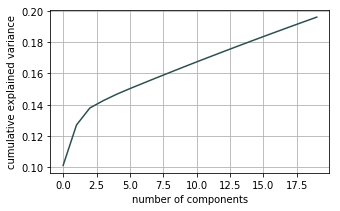

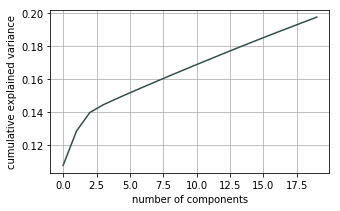

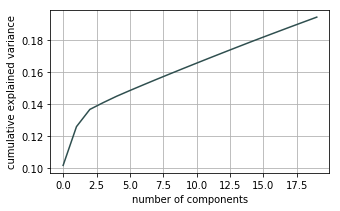

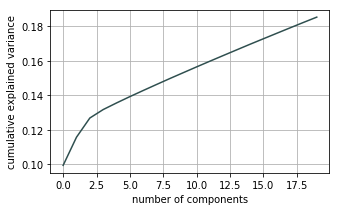

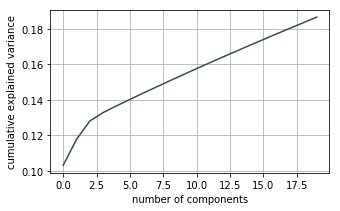

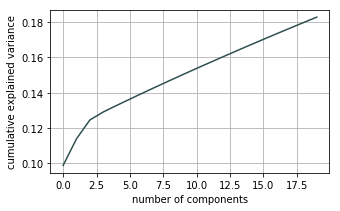

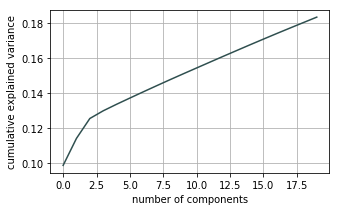

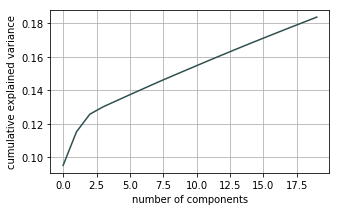

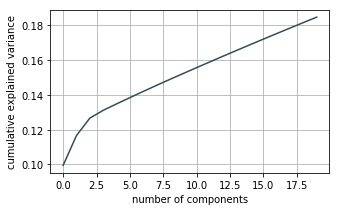

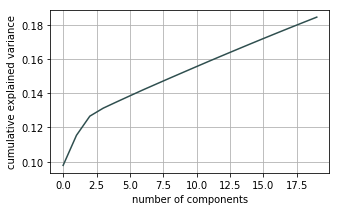

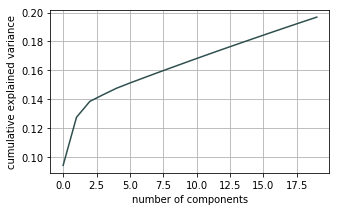

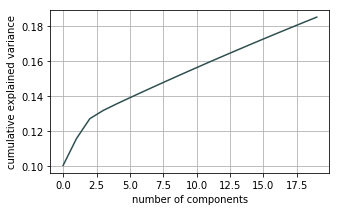

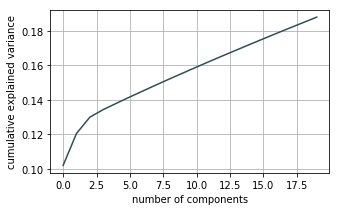

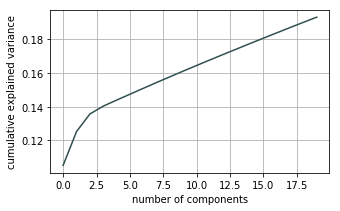

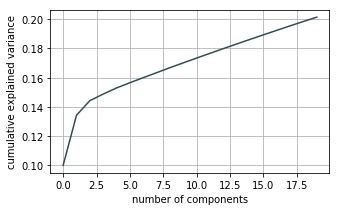

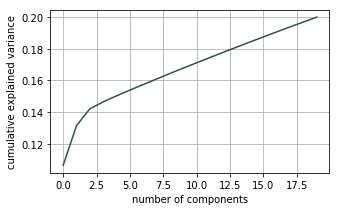

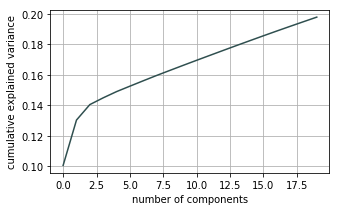

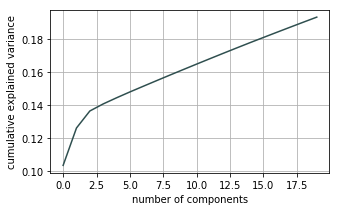

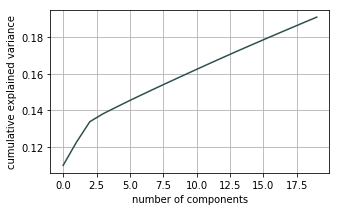

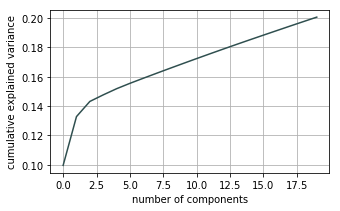

In [6]:
how_many = [1, 2, 5, 10]

for i in range(len(img_adr)):
    img_load = plt.imread(img_adr[i])
    X = img_load
    comp_vectors_pca, mean_pca, projections_pca, restoration_pca = pca(X, n_comp=20, eigenvector=False, projection=False, inverse=False)
    for j in range(len(how_many)):    
        num_comp = how_many[j]
        comp_array = np.arange(num_comp)

        reconstructed_pca = np.dot(projections_pca[:, comp_array], comp_vectors_pca[comp_array]) + mean_pca
        f_name = "fast_scan_%02d_PCA_comp_%02d.png"%(i, how_many[j])
        plt.imsave(fname=f_name, arr=reconstructed_pca, format="png", cmap="gray")